In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sklearn
import sklearn.decomposition
import sklearn.svm
import sklearn.neighbors
import sklearn.preprocessing 

In [2]:
train = pd.read_csv('exoTrain.csv')

In [3]:
train

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [4]:
test = pd.read_csv('exoTest.csv')

In [5]:
test

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,2,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,2,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,2,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,1,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,1,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,1,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,1,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


In [6]:
#DONNEES TEST

In [7]:
features_test = test.transpose()[1:].transpose()

In [8]:
features_test

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,119.88,100.21,86.46,48.68,46.12,39.39,18.57,6.98,6.63,-21.97,...,14.52,19.29,14.44,-1.62,13.33,45.50,31.93,35.78,269.43,57.72
1,5736.59,5699.98,5717.16,5692.73,5663.83,5631.16,5626.39,5569.47,5550.44,5458.80,...,-581.91,-984.09,-1230.89,-1600.45,-1824.53,-2061.17,-2265.98,-2366.19,-2294.86,-2034.72
2,844.48,817.49,770.07,675.01,605.52,499.45,440.77,362.95,207.27,150.46,...,17.82,-51.66,-48.29,-59.99,-82.10,-174.54,-95.23,-162.68,-36.79,30.63
3,-826.00,-827.31,-846.12,-836.03,-745.50,-784.69,-791.22,-746.50,-709.53,-679.56,...,122.34,93.03,93.03,68.81,9.81,20.75,20.25,-120.81,-257.56,-215.41
4,-39.57,-15.88,-9.16,-6.37,-16.13,-24.05,-0.90,-45.20,-5.04,14.62,...,-37.87,-61.85,-27.15,-21.18,-33.76,-85.34,-81.46,-61.98,-69.34,-17.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,107.28,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,-10.48,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,-14.78,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,-4.36,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60


In [9]:
label_test = test.transpose()[:1]

In [10]:
label_test

,0,1,2,3,4,5,6,7,8,9,...,560,561,562,563,564,565,566,567,568,569
LABEL,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [11]:
flux_test = test.transpose()[1:]

In [12]:
flux_test

,0,1,2,3,4,5,6,7,8,9,...,560,561,562,563,564,565,566,567,568,569
FLUX.1,119.88,5736.59,844.48,-826.00,-39.57,14.28,-150.48,-10.06,454.66,187.40,...,5.66,4.36,-79.95,-63.42,144.47,374.46,-0.36,-54.01,91.36,3071.19
FLUX.2,100.21,5699.98,817.49,-827.31,-15.88,10.63,-141.72,-12.78,440.60,209.60,...,7.83,2.22,-79.13,-59.78,20.09,326.06,4.96,-44.13,85.60,2782.53
FLUX.3,86.46,5717.16,770.07,-846.12,-9.16,14.56,-157.60,-13.16,382.29,199.91,...,-4.39,5.61,-81.07,-64.16,147.47,319.87,6.25,-41.23,48.81,2608.69
FLUX.4,48.68,5692.73,675.01,-836.03,-6.37,12.42,-184.60,-9.81,361.63,179.62,...,-0.62,-1.44,-72.25,-61.07,109.18,338.23,4.20,-42.82,48.69,2325.47
FLUX.5,46.12,5663.83,605.52,-745.50,-16.13,12.07,-164.89,-18.91,298.63,171.21,...,-5.23,-0.05,-79.71,-41.74,100.87,251.54,8.26,-39.47,70.05,2089.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUX.3193,45.50,-2061.17,-174.54,20.75,-85.34,-4.78,-8.40,35.89,-78.18,-26.64,...,46.15,6.03,7.25,-37.84,-376.53,-166.83,-13.68,-17.14,-10.25,1354.41
FLUX.3194,31.93,-2265.98,-95.23,20.25,-81.46,-4.34,-16.80,-33.44,-184.39,-13.90,...,37.28,-6.13,-8.25,-2.37,-176.22,-235.66,-3.59,-4.25,-37.06,-192.81
FLUX.3195,35.78,-2366.19,-162.68,-120.81,-61.98,7.67,-8.03,-30.83,-142.31,17.03,...,45.60,-10.46,-7.91,6.62,-152.07,-213.63,-5.32,5.47,-8.43,-277.22
FLUX.3196,269.43,-2294.86,-36.79,-257.56,-69.34,-0.33,-12.73,-33.00,-113.12,4.36,...,41.66,-5.36,4.45,12.02,-216.60,-205.99,-10.98,14.46,-6.48,-69.63


In [13]:
#DONNEES TRAIN

In [14]:
features_train = train.transpose()[1:].transpose()

In [15]:
features_train

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,-160.17,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,-73.38,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,484.39,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,323.33,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,-970.88,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,-11.88,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,384.34,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,238.51,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,6.29,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


In [16]:
label_train = train.transpose()[:1]

In [17]:
label_train

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
LABEL,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
flux_train = train.transpose()[1:]

In [19]:
flux_train

,0,1,2,3,4,5,6,7,8,9,...,5077,5078,5079,5080,5081,5082,5083,5084,5085,5086
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.10,9.34,238.77,-103.54,-265.91,...,125.57,7.45,475.61,-46.63,299.41,-91.91,989.75,273.39,3.82,323.28
FLUX.2,83.81,-33.83,535.92,347.39,-1112.59,163.57,49.96,262.16,-118.97,-318.59,...,78.69,10.02,395.50,-55.39,302.77,-92.97,891.01,278.00,2.09,306.36
FLUX.3,20.10,-58.54,513.73,302.35,-1118.95,179.16,33.30,277.80,-108.93,-335.66,...,98.29,6.87,423.61,-64.88,278.68,-78.76,908.53,261.73,-3.29,293.16
FLUX.4,-26.98,-40.09,496.92,298.13,-1095.10,187.82,9.63,190.16,-72.25,-450.47,...,91.16,-2.82,376.36,-88.75,263.48,-97.33,851.83,236.99,-2.88,287.67
FLUX.5,-39.56,-79.31,456.45,317.74,-1057.55,188.46,37.64,180.98,-61.46,-453.09,...,78.42,-1.56,338.94,-75.40,236.89,-68.00,755.11,280.73,1.66,249.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FLUX.3193,92.54,0.76,5.06,-12.67,-438.54,19.27,-0.44,95.30,4.53,3162.53,...,210.09,8.75,163.02,28.82,-74.95,151.75,-136.16,-3.47,-1.50,-25.33
FLUX.3194,39.32,-11.70,-11.80,-8.77,-399.71,-43.90,10.90,48.86,21.95,3398.28,...,3.80,-10.69,86.29,-20.12,-46.29,-24.45,38.03,65.73,-4.65,-41.31
FLUX.3195,61.42,6.46,-28.91,-17.31,-384.65,-41.63,-11.77,-10.62,26.94,3648.34,...,16.33,-9.54,13.06,-14.41,-3.08,-17.00,100.28,88.42,-14.55,-16.72
FLUX.3196,5.08,16.00,-70.02,-17.35,-411.79,-52.90,-9.25,-112.02,34.08,3671.97,...,27.35,-2.48,161.22,-43.35,-28.43,3.23,-45.64,79.07,-6.41,-14.09


In [20]:
#PCA

In [21]:
varianceExplained=0.95
preProc = sklearn.decomposition.PCA(n_components=varianceExplained,svd_solver='full') 

In [22]:
X_train = features_train
Y_train = label_train
X_test = features_test
Y_test = label_test

In [23]:
preProc.fit(X_train)

PCA(n_components=0.95, svd_solver='full')

In [24]:
nbComp=preProc.n_components_
print(nbComp)

8


(0.0, 1.0)

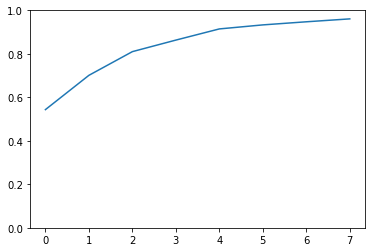

In [25]:
CumulativeExplainedVariance = np.cumsum(preProc.explained_variance_ratio_)
plt.plot(CumulativeExplainedVariance)
plt.ylim([0,1])

In [26]:
#Essai PCA 2 composantes
from sklearn.preprocessing import StandardScaler

In [27]:
preProcBis = sklearn.decomposition.PCA(n_components=2,svd_solver='full') 
preProcBis.fit(X_train)

PCA(n_components=2, svd_solver='full')

In [46]:
constSTD = StandardScaler().fit_transform(X_train)
constPCA = preProcBis.fit_transform(constSTD)

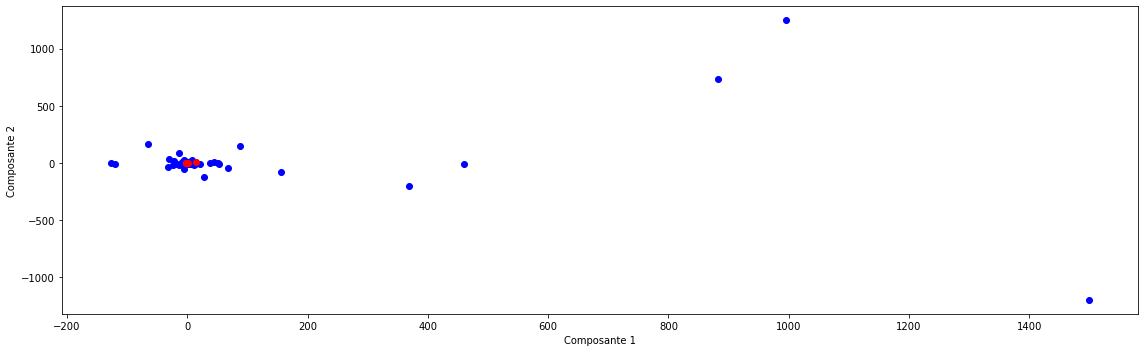

In [47]:
labels = train.iloc[:,0]
plt.figure(figsize=(16, 5))
for lab, col in zip((1, 2),
                        ('blue', 'red')):
        plt.scatter(constPCA[labels==lab, 0],
                    constPCA[labels==lab, 1],
                    label=lab,
                    c=col)
plt.xlabel('Composante 1')
plt.ylabel('Composante 2')
plt.tight_layout()
plt.show()

In [ ]:
#SVC